In [1]:
# !pip install imblearn
# !pip install plotly

In [1]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
import pprint

# Math
from scipy.stats import loguniform

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report, matthews_corrcoef

# Processing Data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV, PredefinedSplit
from sklearn.model_selection import PredefinedSplit

# Neural Network Models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping

# Resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
# Read csv file using pandas library
df = pd.read_csv("creditcard.csv")

In [3]:
# Printing first 5 values after reading data, 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


# Data Analysis & Pre-processing 

In [4]:
# It shows the csv file contains how many rows and columns?
df.shape

(57355, 31)

In [5]:
# It shows that how many unique values present in Class column
df['Class'].unique()

array([0, 1], dtype=int64)

In [6]:
# It shows the information regarding dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

In [7]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Time,0,0.0
V16,0,0.0
Amount,0,0.0
V28,0,0.0
V27,0,0.0


The dataset has already been wiped clean and a fundamental element evaluation has been executed to lessen the dimensionality of the information, at the same time as additionally making sure characteristic and consumer confidentiality. Two functions stay of their unique form: Time and Amount. Below is an exploratory evaluation of the information to assist supply perception into the information and a way to method in addition feature engineering, feature scaling and sampling techniques.

The plotly Python library is an interactive, open-supply plotting library that helps over forty particular chart sorts masking a extensive variety of statistical, financial, geographic, scientific, and third-dimensional use-cases.

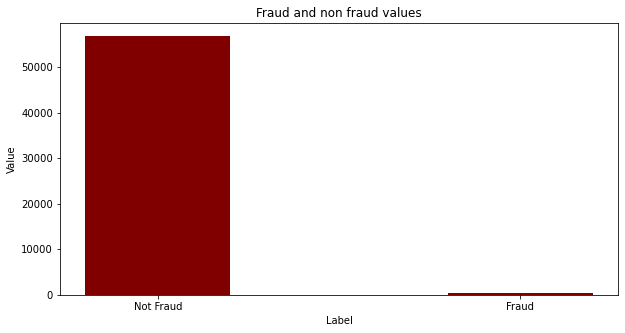

In [8]:
# plot histogram to represent the class imbalance - Significant imbalance evident

Labels = ["Not Fraud","Fraud"]
values = list(df["Class"].value_counts())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Labels, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Label")
plt.ylabel("Value")
plt.title("Fraud and non fraud values")
plt.show()

Text(0, 0.5, 'Total Amount')

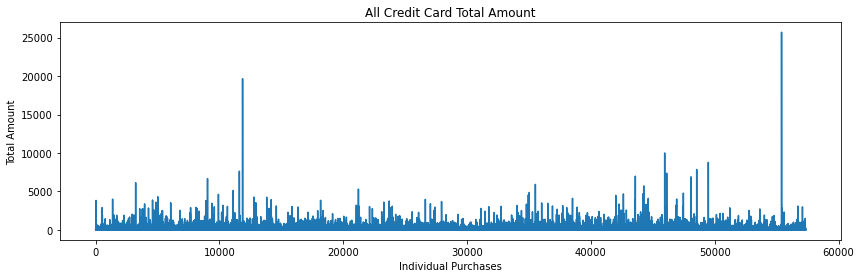

In [9]:
# Ploting All credit card transaction total amount

df['Amount'].plot(figsize = (14, 4 ))
plt.title("All Credit Card Total Amount")
plt.xlabel("Individual Purchases")
plt.ylabel("Total Amount")

In [11]:
# display original and duplicated rows
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
397,1548,-1.559446,1.425546,0.812589,-1.129381,0.507528,0.183507,0.654304,0.088059,0.480018,...,-0.283995,-0.413642,-0.234995,-0.789509,0.324851,0.419737,0.329608,0.351346,5.00,0
398,1548,-1.559446,1.425546,0.812589,-1.129381,0.507528,0.183507,0.654304,0.088059,0.480018,...,-0.283995,-0.413642,-0.234995,-0.789509,0.324851,0.419737,0.329608,0.351346,5.00,0
2833,24646,1.100828,0.115819,1.539031,1.643405,-0.753781,0.227847,-0.629308,0.085986,2.116901,...,-0.273328,-0.166427,0.092607,0.374218,0.335810,-0.488461,0.070995,0.030446,1.00,0
2834,24646,1.100828,0.115819,1.539031,1.643405,-0.753781,0.227847,-0.629308,0.085986,2.116901,...,-0.273328,-0.166427,0.092607,0.374218,0.335810,-0.488461,0.070995,0.030446,1.00,0
3659,29058,1.076018,-0.126284,1.320255,1.154681,-0.892714,0.356662,-0.792107,0.396302,0.630048,...,0.071098,0.320206,0.055667,0.204490,0.230282,-0.396762,0.077135,0.024214,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54080,163152,-1.196037,1.585949,2.883976,3.378471,1.511706,3.717077,0.585362,-0.156001,0.122648,...,-0.370294,0.524395,-0.355170,-0.869790,-0.133198,0.327804,-0.035702,-0.858197,7.56,0
54081,163152,-1.196037,1.585949,2.883976,3.378471,1.511706,3.717077,0.585362,-0.156001,0.122648,...,-0.370294,0.524395,-0.355170,-0.869790,-0.133198,0.327804,-0.035702,-0.858197,7.56,0
55834,167397,-3.665041,1.485038,-2.453237,-0.573034,0.451813,-0.193622,0.940279,-0.303793,1.177504,...,0.511187,1.225418,-0.412156,-0.528074,-0.584538,-0.487005,-3.698726,-0.232653,26.73,0
55835,167397,-3.665041,1.485038,-2.453237,-0.573034,0.451813,-0.193622,0.940279,-0.303793,1.177504,...,0.511187,1.225418,-0.412156,-0.528074,-0.584538,-0.487005,-3.698726,-0.232653,26.73,0


In [12]:
df.shape

(57355, 31)

In [13]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df[df.duplicated()]
duplicate.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
398,1548,-1.559446,1.425546,0.812589,-1.129381,0.507528,0.183507,0.654304,0.088059,0.480018,...,-0.283995,-0.413642,-0.234995,-0.789509,0.324851,0.419737,0.329608,0.351346,5.00,0
2834,24646,1.100828,0.115819,1.539031,1.643405,-0.753781,0.227847,-0.629308,0.085986,2.116901,...,-0.273328,-0.166427,0.092607,0.374218,0.335810,-0.488461,0.070995,0.030446,1.00,0
3660,29058,1.076018,-0.126284,1.320255,1.154681,-0.892714,0.356662,-0.792107,0.396302,0.630048,...,0.071098,0.320206,0.055667,0.204490,0.230282,-0.396762,0.077135,0.024214,1.00,0
4362,31644,-1.351835,0.846030,1.702911,0.039672,0.013152,-0.359990,0.959710,-0.256802,0.984675,...,-0.385289,-0.198955,0.025982,0.395285,-0.025449,0.217010,0.325027,-0.013132,33.23,0
5184,33619,1.163253,-0.014139,1.272299,1.420947,-0.926893,-0.121972,-0.519157,0.093523,0.977292,...,-0.180902,-0.219039,0.020564,0.398989,0.448507,-0.456745,0.075666,0.035279,1.00,0


In [14]:
# Total number of duplicated values for our Fraud transaction in Target 'Class'
print ("Duplicated total values:",duplicate.shape[0])

Duplicated total values: 93


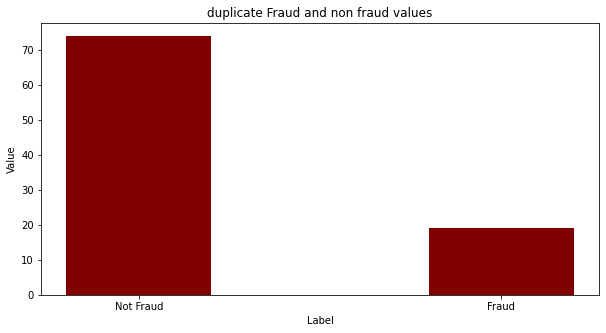

In [15]:
# plot histogram to represent the duplicate values
Labels = ["Not Fraud","Fraud"]
values = list(duplicate["Class"].value_counts())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Labels, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Label")
plt.ylabel("Value")
plt.title("duplicate Fraud and non fraud values")
plt.show()

In [16]:
# Checking shape of data before droping dupicate values
df.shape

(57355, 31)

In [17]:
# drop duplicated values and reset index
df.drop_duplicates(inplace=True, ignore_index=True)

In [18]:
# Checking shape of data after droping dupicate values
df.shape

(57262, 31)

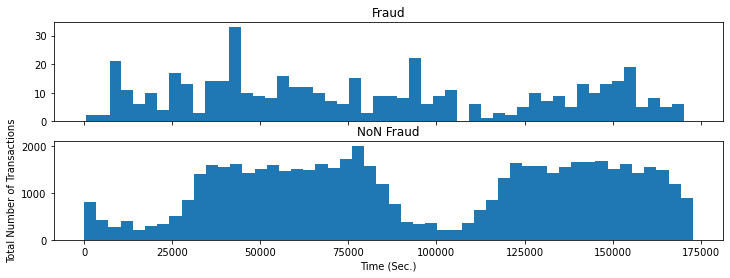

In [19]:
# Ploting the time using matplotlib
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins) # ploting Time of fraud transaction
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins) # ploting Time of Non fraud transaction
ax2.set_title('NoN Fraud')

plt.xlabel('Time (Sec.)')
plt.ylabel('Total Number of Transactions')
plt.show()

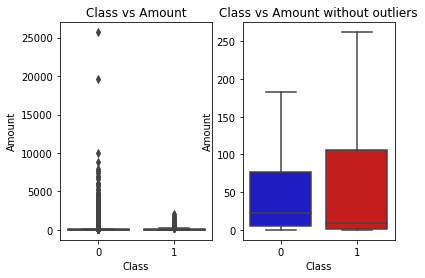

In [20]:
# Plotting Outliers for Amount

f, axes = plt.subplots(ncols=2)
colors = ["#0101DF", "#DF0101"]

sns.boxplot(x="Class", y="Amount", data=df, palette=colors, ax=axes[0],showfliers=True)
axes[0].set_title('Class vs Amount')

sns.boxplot(x="Class", y="Amount", data=df, palette=colors, ax=axes[1],showfliers=False)
axes[1].set_title('Class vs Amount without outliers')

plt.show()

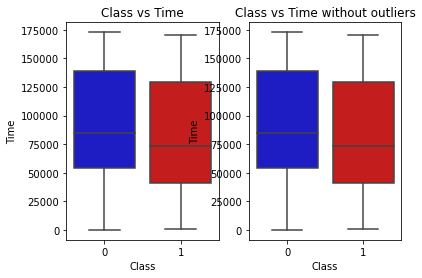

In [21]:
# Plotting Outliers for Time

f, axes = plt.subplots(ncols=2)

sns.boxplot(x="Class", y="Time", data=df, palette=colors, ax=axes[0],showfliers=True)
axes[0].set_title('Class vs Time')

sns.boxplot(x="Class", y="Time", data=df, palette=colors, ax=axes[1],showfliers=False)
axes[1].set_title('Class vs Time without outliers')

plt.show()

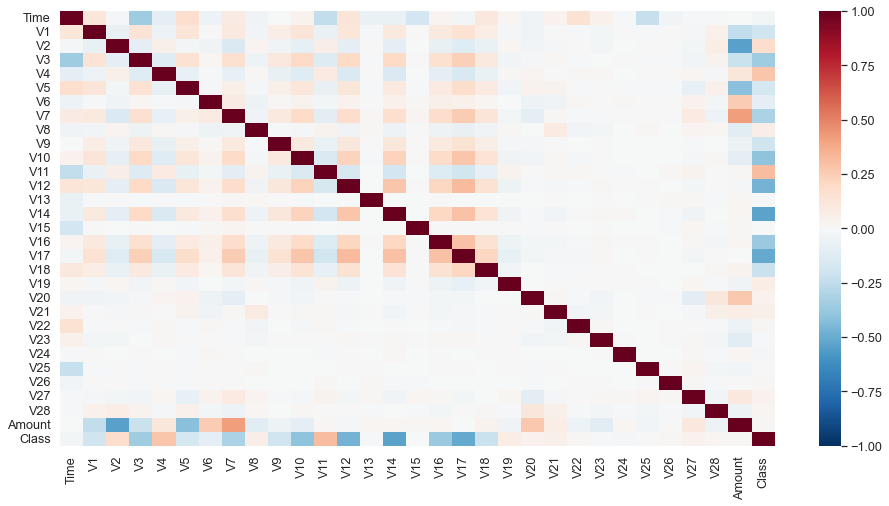

In [22]:
sns.set(font_scale=1.15)
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap='RdBu_r', vmin=-1, vmax=1);

#### Data analysis conclusion

1) Before finding out out classifier, it's robustness or now no longer rely on the skewness. Risking is Overfit the dominating elegance at the same time as neglecting all different minor instructions which can be low in amount.

2) The minority elegance should act as an outlier for the statistical version in imbalanced datasets.

3) Ignoring Imbalance or Outliers it'll cause terrible overall performance withinside the minority fraud elegance, which can be our maximum crucial result.

4) Before leaping into balancing our dataset. First will scale functions in dataset with the aid of using carry out Standardization as system mastering algorithms generally tend to carry out higher whilst numerical enter variables are scaled to a fashionable range.

In [26]:
# Making data balanced
df=df.sample(frac=1)

# checking fraud data shape
fraud_df=df.loc[df['Class']==1]

# Amount of fraud data = amount of non fraud data
non_fraud_df=df.loc[df['Class']==0][:492]

# concatinating fraud and non fraud data
dff=pd.concat([fraud_df,non_fraud_df])
dff

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
52696,160243,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,...,0.203563,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,156.00,1
2904,25198,-15.903635,10.393917,-19.133602,6.185969,-12.538021,-4.027030,-13.897827,10.662252,-2.844954,...,1.577548,-1.280137,-0.601295,0.040404,0.995502,-0.273743,1.688136,0.527831,99.99,1
30404,93904,-11.320633,7.191950,-13.179083,9.099552,-10.094749,-2.440115,-14.184337,4.452503,-6.241960,...,1.082235,-0.350562,0.483044,0.661133,-0.396522,-0.413315,-0.997548,-0.235036,37.93,1
40068,132688,0.432554,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,...,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1.00,1
6220,35906,-3.519030,4.140867,-3.628202,5.505672,-4.057463,-0.905945,-6.652031,2.634524,-4.679402,...,1.582556,0.778710,-0.135707,-0.004278,0.032706,0.362014,0.900925,0.554897,9.13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,37094,1.018615,-0.267876,-0.380947,0.989091,0.289769,0.416690,0.124389,0.063297,0.249915,...,0.076225,-0.065807,-0.360761,-1.338606,0.694652,-0.175269,-0.001630,0.026177,144.00,0
48830,151572,-1.354702,-2.572802,-1.498942,-1.633795,-2.392976,-0.339903,4.489587,-1.238685,-3.444340,...,0.746884,1.188459,1.719944,0.433444,0.814185,0.254582,-0.397785,-0.026176,955.83,0
14178,53627,-1.400642,0.873911,-1.406248,0.287847,1.652653,3.710259,-0.758589,0.844324,-0.897738,...,0.909730,-0.043558,0.214201,1.007881,0.173009,-0.187625,-0.090432,-0.346800,55.90,0
54618,164538,-0.192871,0.379813,0.906022,-0.627253,0.137890,0.090943,0.702124,-0.433076,1.056485,...,-0.075647,0.128584,0.133430,-0.540847,-1.105383,-1.074559,-0.591507,-0.377228,47.30,0


In [27]:
dff.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
52696,160243,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,...,0.203563,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,156.00,1
2904,25198,-15.903635,10.393917,-19.133602,6.185969,-12.538021,-4.027030,-13.897827,10.662252,-2.844954,...,1.577548,-1.280137,-0.601295,0.040404,0.995502,-0.273743,1.688136,0.527831,99.99,1
30404,93904,-11.320633,7.191950,-13.179083,9.099552,-10.094749,-2.440115,-14.184337,4.452503,-6.241960,...,1.082235,-0.350562,0.483044,0.661133,-0.396522,-0.413315,-0.997548,-0.235036,37.93,1
40068,132688,0.432554,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,...,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1.00,1
6220,35906,-3.519030,4.140867,-3.628202,5.505672,-4.057463,-0.905945,-6.652031,2.634524,-4.679402,...,1.582556,0.778710,-0.135707,-0.004278,0.032706,0.362014,0.900925,0.554897,9.13,1


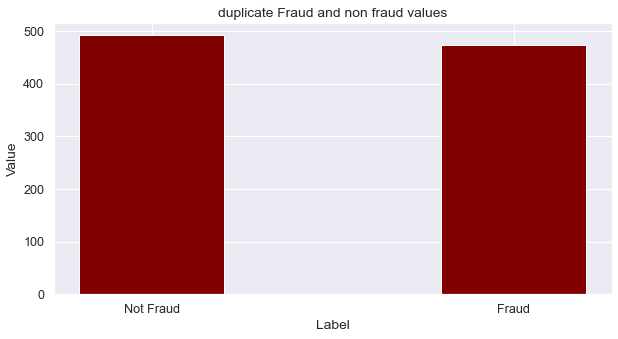

In [28]:
# plot histogram to represent the Balanced data
Labels = ["Not Fraud","Fraud"]
values = list(dff["Class"].value_counts())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Labels, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Label")
plt.ylabel("Value")
plt.title("duplicate Fraud and non fraud values")
plt.show()

# Spliting data for Training and Testing

In [29]:
# seperate target and feature variables
x = dff.drop(['Class'], axis=1) # Independant Feature
y = dff['Class'] # Dependant Feature

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# scaler = MinMaxScaler()
# scaler.fit(x)
# x = scaler.transform(x)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [32]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [7]:
from hmmlearn import hmm
import numpy as np

In [17]:
startprob = np.array([0.6, 0.3, 0.1])
transmat = np.array([[0.7, 0.2, 0.1], [0.3, 0.5, 0.2], [0.3, 0.3, 0.4]])
means = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
covars = np.tile(np.identity(2), (3, 1, 1))
model = hmm.GaussianHMM(3, "full", startprob, transmat)

In [18]:
model.means_ = means

In [19]:
model.covars_ = covars

In [11]:
X, Z = model.sample(100)
X

NotFittedError: This GaussianHMM instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

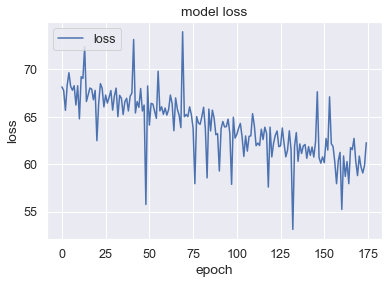

In [47]:
plt.plot(loss_list)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

## Observation

1) Data scaling is done before the model is trained. There are two types of scalars: MinMax scalar and Standard scalar, which are used to scale data.

2) As we scaled the data using both MinMax and Standard Scalar, we saw notable differences in accuracy and loss.

3) The accuracy of the MinMax Scalar was unchanged, but the accuracy of the standard scalar increased.

4) Our technique appears to identify many fraudulent cases. However, there are a lot of regular transactions that are frauds. 

5) achieve better results, the threshold might occasionally be adjusted.